### Problem 1
Simulate different non-linear models. Three good models to start out with
are: SETAR(2;1;1), IGAR(2;1), and MMAR(2;1). Try different parameters.
For reporting, write the models and discuss the most essential features of
each model together with some informative plots.
Hints
R and Matlab: Check out the script 3dPlotting.R. It starts out showing a
simple way to implement a simulation of a process with a for-loop.

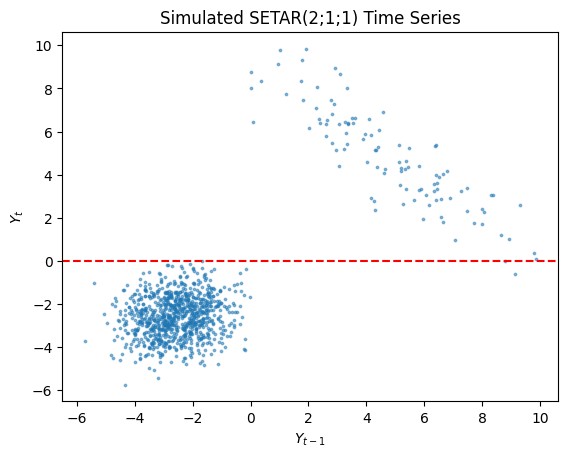

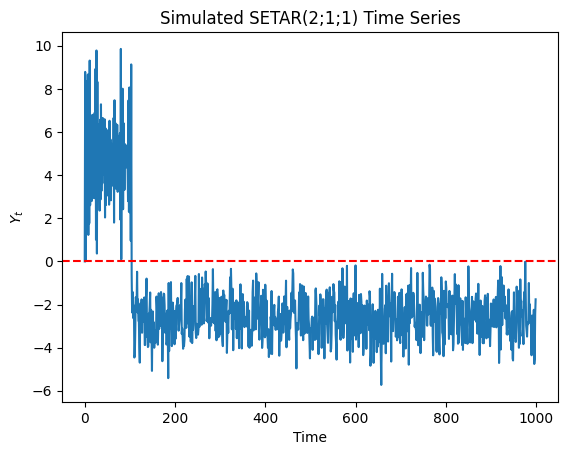

In [89]:
# Simulate SETAR(2;1;1) with different parameters and plot the results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a_0_1 = -2
a_1_1 = 0.2
a_0_2 = 9
a_1_2 = -0.9

n = 1000
Y = np.zeros(n)
for t in range(1, n):
    if Y[t-1] < 0:
        Y[t] = a_0_1 + a_1_1* Y[t-1] + np.random.normal()
    else:
        Y[t] = a_0_2 + a_1_2 * Y[t-1] + np.random.normal()
df = pd.DataFrame(Y, columns=['Value'])
plt.figure()
plt.scatter(Y[: -1], Y[1 : ], s = 3, alpha = 0.5)
plt.axhline(y = 0, linestyle="--", color = 'red')
plt.title('Simulated SETAR(2;1;1) Time Series')
plt.xlabel(rf'$Y_{{t-1}}$')
plt.ylabel(rf'$Y_{{t}}$')
# plt.grid('on')
plt.show()

# Figure of time series
plt.figure()
plt.plot([i for i in range(len(Y))], Y, label = 'SETAR(2, 1, 1)')
plt.axhline(y = 0, linestyle="--", color = 'red')
plt.title('Simulated SETAR(2;1;1) Time Series')
plt.xlabel('Time')
plt.ylabel(rf'$Y_{{t}}$')
# plt.grid('on')
plt.show()

### Simulation of IGAR(2; 1) model

#### Model:

$X_t = a_0^{J_t} + \Sigma_{i=1}^{k_{J_{t}}} a_i^{J_t}X_{t-i} + \varepsilon_t^{(J_t)}$

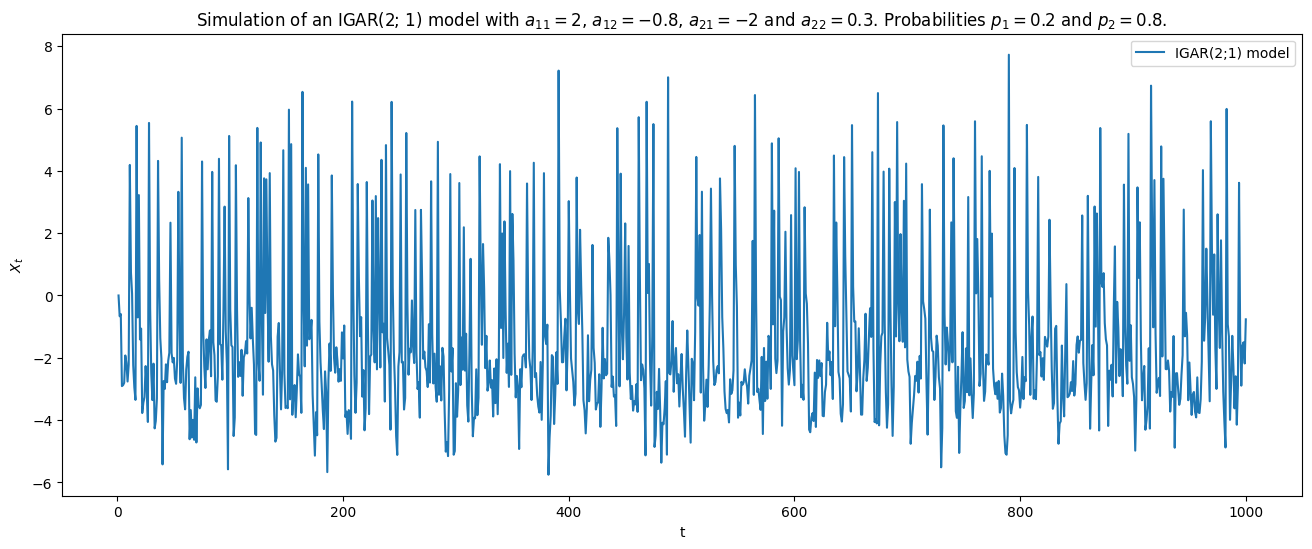

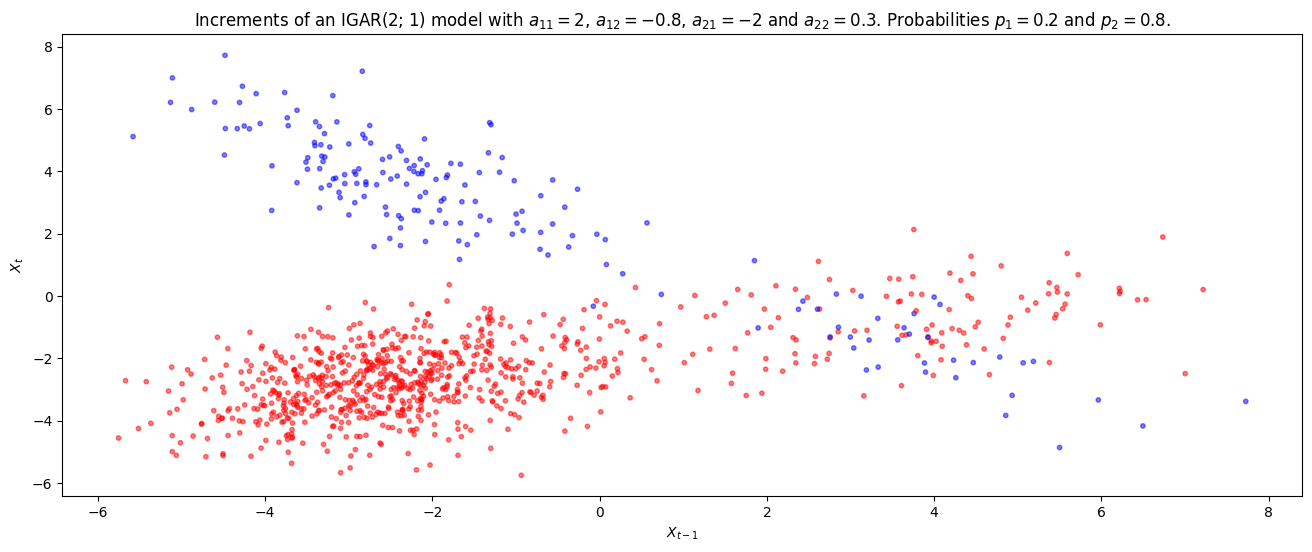

In [90]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a_00 = 2
a_01 = -0.8
a_10 = -2
a_11 = 0.3
a = [[a_00, a_01], [a_10, a_11]]
p_1 = 0.2 # probability p_1
p_2 = 1 - p_1 # probability p_2

J_t_prob = [p_1, p_2]
J_mask = [] # Binary coloring solely for plotting purposes
J_t_values = [i for i in range(len(J_t_prob))]
n = 1000
t_vec = [i + 1 for i in range(n)]
X = [0]

# Random variable addition parameters
mu = 0
sigma = 1


for t in range(1, n):

    J_t = random.uniform(0, 1)
    epsilon_t = np.random.normal(mu, sigma)
    
    # Randomly select a regime
    J_t_val = random.choices([0, 1], weights=J_t_prob)[0]
    J_mask.append(J_t_val)

    # Appending new values    
    X_t = a[J_t_val][0] + a[J_t_val][1] * X[-1] + epsilon_t
    X.append(X_t)

plt.figure(figsize=(16, 6))
plt.plot(t_vec, X, label = "IGAR(2;1) model")
plt.legend()
plt.xlabel('t')
plt.ylabel(rf'$X_{{t}}$')
plt.title(rf'Simulation of an IGAR(2; 1) model with $a_{{11}} = {a_00}$, $a_{{12}} = {a_01}$, $a_{{21}} = {a_10}$ and $a_{{22}} = {a_11}$. Probabilities $p_1 = {J_t_prob[0]}$ and $p_2 = {J_t_prob[1]}$.')
plt.show()

# Plot of lag 1

plt.figure(figsize=(16, 6))
colors = ['blue' if color == 0 else 'red' for color in J_mask]
plt.scatter(X[ : -1], X[1 : ], s = 10, alpha = 0.5, c = colors)
plt.title(rf'Increments of an IGAR(2; 1) model with $a_{{11}} = {a_00}$, $a_{{12}} = {a_01}$, $a_{{21}} = {a_10}$ and $a_{{22}} = {a_11}$. Probabilities $p_1 = {J_t_prob[0]}$ and $p_2 = {J_t_prob[1]}$.')
plt.xlabel(rf'$X_{{t-1}}$')
plt.ylabel(rf'$X_{{t}}$')
plt.show()

# Correlation Sample ACF
max_lag = 10



### Part 2

999

999



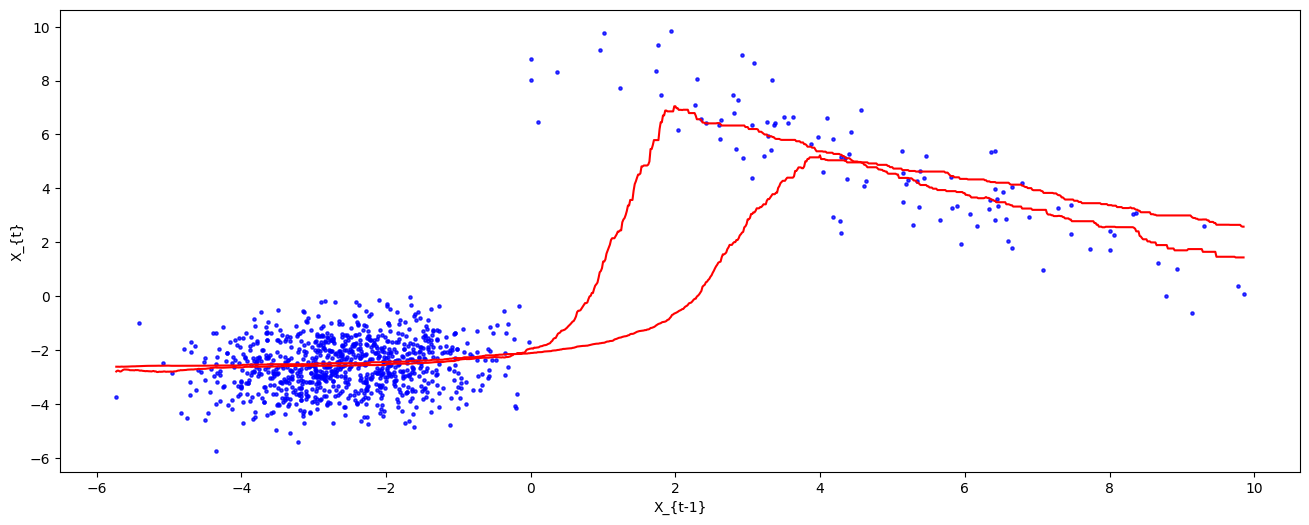

In [ ]:
# Data
X = np.array(df['Value'])

# Defining parameters
N = len(X)
h = 2


def kernel(x, kernel_function = 'gaussian'):
    # Make each kernel selectable
    if kernel_function == 'rectangular':
        return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)
    else:
        return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

def local_kernel_regression(X, h, k = 1, kernel_function = 'gaussian'):
    X_t, X_t_k = X[k : ], X[ : -k]
    X_span = np.linspace(min(X_t_k), max(X_t_k), len(X_t))
    X_t_hat = []

    # Time series estimation as a function of lagged time series
    for x in X_span:
        X_t_hat.append(sum(kernel(((x - X_t_k) / h), kernel_function) *  X_t)  / sum(kernel(((x - X_t_k) / h), kernel_function)) )
    

    plt.scatter(X_t_k, X_t, color = 'blue', s = 5, alpha = 0.5)
    plt.plot(X_span, X_t_hat, color = "red", label = f'Kernel regression with kernel function {kernel_function}, with h={h}')
    plt.xlabel(rf'X_{{t-1}}')
    plt.ylabel(rf'X_{{t}}')

h_list = [2, 4]

plt.figure(figsize=(16, 6))
for h in h_list:
    local_kernel_regression(np.array(X), h, kernel_function='rectangular')
plt.show()


### Part 3

1000


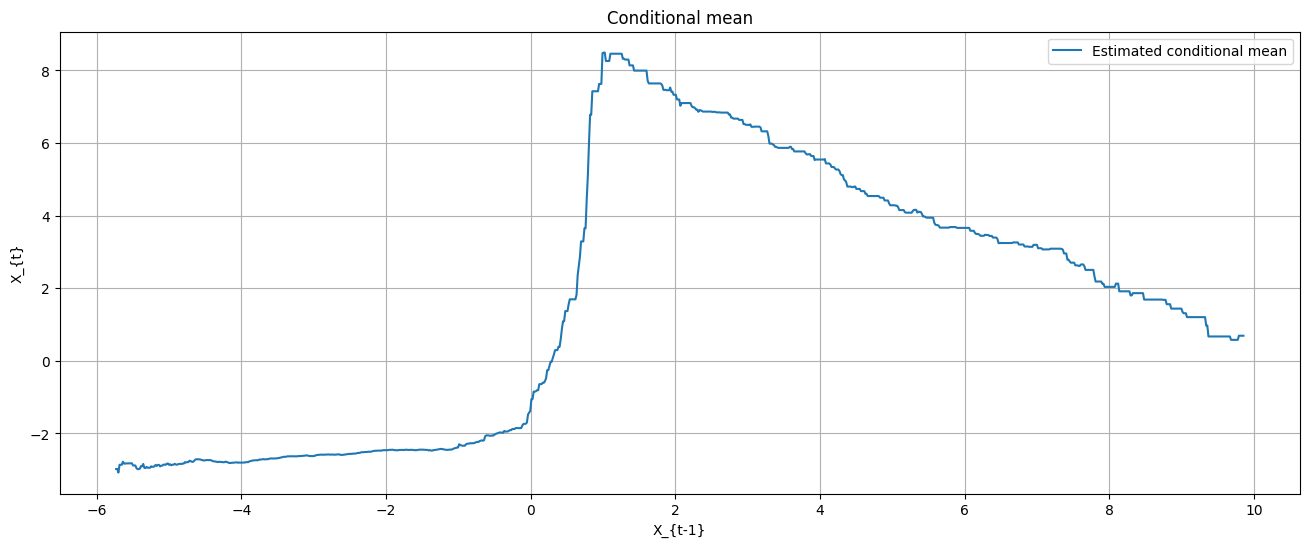

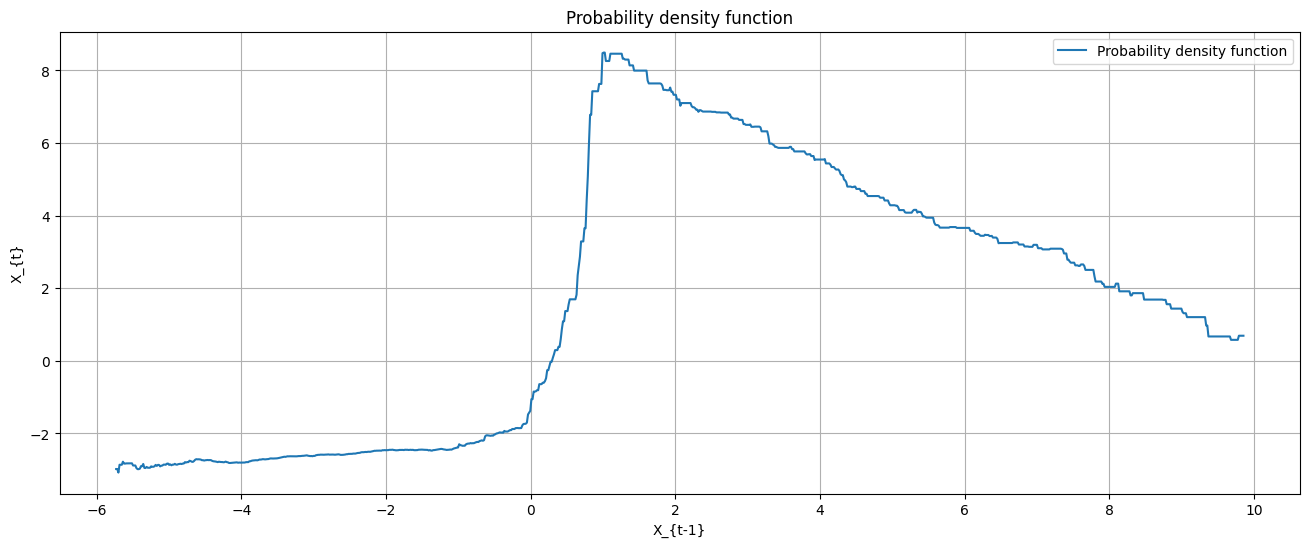

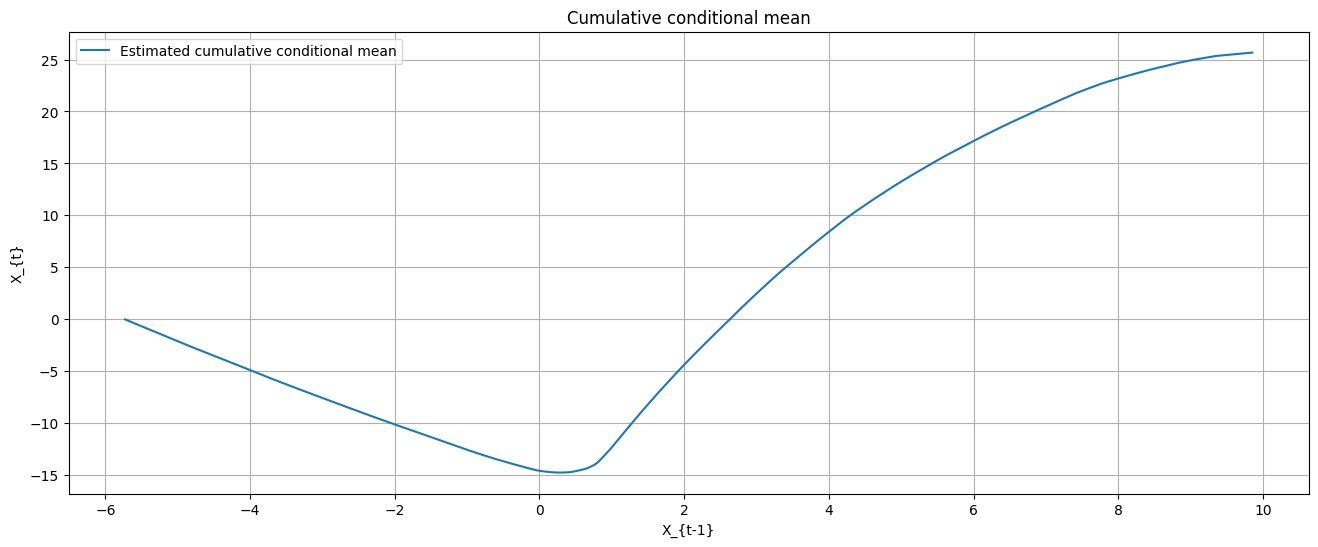

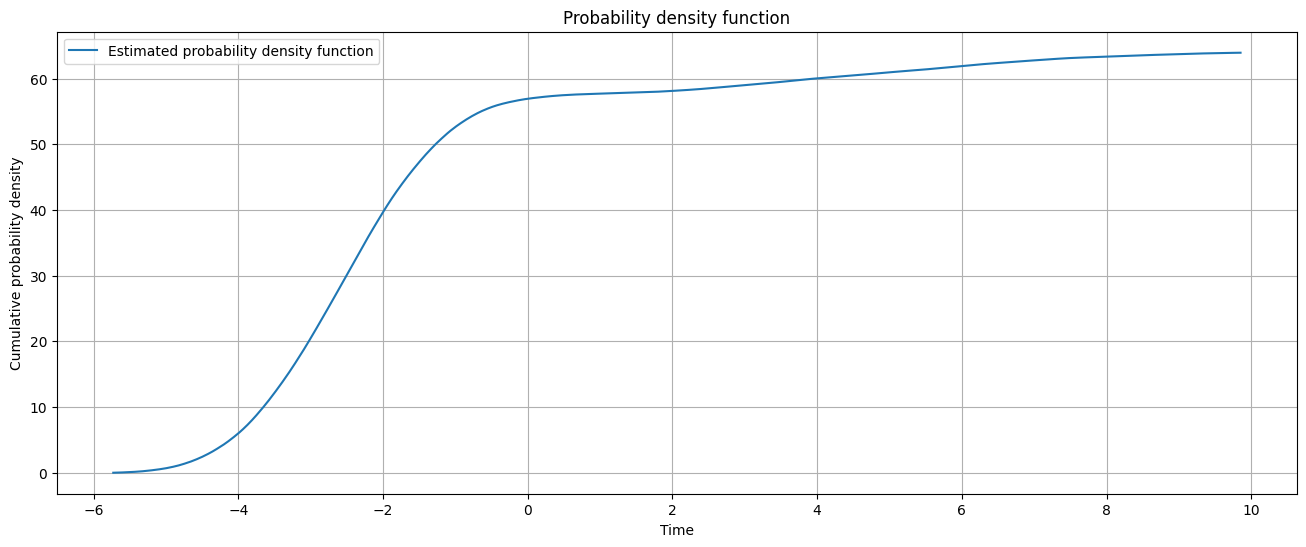

In [ ]:
# Data
X = np.array(df['Value'])

# Defining parameters
N = len(X)
h = 2


def kernel(x, kernel_function = 'gaussian'):
    # Make each kernel selectable
    if kernel_function == 'rectangular':
        return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)
    else:
        return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

def local_prob_estimator(X, h, k = 1, kernel_function = 'gaussian'):
    X_t, X_t_k = X[k : ], X[ : -k]
    N = 1000
    N_bins = 10
    X_span = np.linspace(min(X_t_k), max(X_t_k), N)
    X_span_bins = np.linspace(min(X_t_k), max(X_t_k), N_bins + 1)
    X_t_hat = []
    X_t_prob = []

    # Time series estimation as a function of lagged time series
    for x in X_span:
        X_t_hat.append(sum(kernel(((x - X_t_k) / h), kernel_function) *  X_t)  / sum(kernel(((x - X_t_k) / h), kernel_function)))
        X_t_prob.append(1 / len(X_t) * sum(kernel(((x - X_t_k) / h), kernel_function)))
    
    # Plotting of the conditional mean
    plt.figure(figsize=(16, 6))
    plt.plot(X_span, X_t_hat, label = 'Estimated conditional mean')
    plt.legend()
    plt.grid('on')
    plt.title('Conditional mean')
    plt.xlabel(rf'X_{{t-1}}')
    plt.ylabel(rf'X_{{t}}')
    plt.show()

    # Plotting of probability density function
    plt.figure(figsize=(16, 6))
    plt.plot(X_span, X_t_hat, label = 'Probability density function')
    plt.legend()
    plt.grid('on')
    plt.title('Probability density function')
    plt.xlabel(rf'X_{{t-1}}')
    plt.ylabel(rf'X_{{t}}')
    plt.show()


    cumulative_conditional_mean = np.cumsum([i * ((max(X_t_k) - min(X_t_k)) / N) for i in X_t_hat])
    cumulative_density = np.cumsum([i for i in X_t_prob])

    # Plotting of cumulative conditional mean
    plt.figure(figsize=(16, 6))
    plt.plot(X_span, cumulative_conditional_mean, label = 'Estimated cumulative conditional mean')
    plt.legend()
    plt.grid('on')
    plt.title('Cumulative conditional mean')
    plt.xlabel(rf'X_{{t-1}}')
    plt.ylabel(rf'X_{{t}}')
    plt.show()

    # Plotting of cumulative probability density
    plt.figure(figsize=(16, 6))
    plt.plot(X_span, cumulative_density, label = 'Estimated probability density function')
    plt.legend()
    plt.grid('on')
    plt.title('Probability density function')
    plt.xlabel('Time')
    plt.ylabel('Cumulative probability density')
    plt.show()



local_prob_estimator(X, h = 1, kernel_function='rectangular')




## Part 4

In [93]:
import numpy as np
import pandas as pd 
from scipy.optimize import minimize

df = pd.read_csv('/Users/03mare02/Documents/GitHub/advanced_time_series_analysis/DataPart4.csv')
df['U_a'] = df['Ph'] / (df['Ti'] - df['Te'])
print(df.head())

            Ph         Ti         Te         W         U_a
0  1496.970334  20.002530  12.255610  8.678768  193.234261
1  1411.792178  19.957051  12.298405  7.185271  184.339658
2  1368.595696  19.904727  12.576470  6.684292  186.755957
3  1404.547674  19.886161  12.455047  7.702868  189.009055
4  1376.436161  19.908530  12.638600  7.047383  189.332786


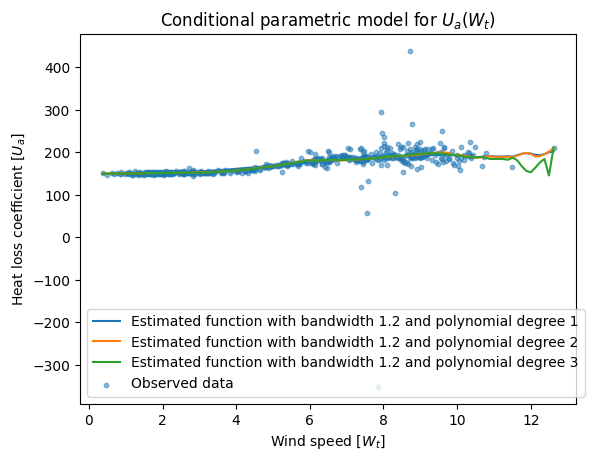

In [105]:
# Final function, only work on this

# To do:
# Investigate what kernels to use - rectangular might not be the optimal case.


# Define the weight function
def kernel(x):
    return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)

# Get the interval that the function is estimated over
nr_data = 100
w_span = np.linspace(min(df['W']), max(df['W']), nr_data) # Linear regression of the interval we are estimating the function in

# Define the loss function that we are trying to minimize
def loss(data, theta_params, w, h = 2): 
    # Define all the values that we want to minimize   
    return 1 / len(data) * sum(kernel((w - data['W']) / h ) * (
    (
    data['Ph'] / (data['Ti'] - data['Te']
    )
    ) - 
    theta((w - data['W']), theta_params)
    ) ** 2
    )

#### Trial function
def least_squares(data, w, degree_of_polynomial, h = 2):
    # K: Kernel weights for the function
    # W: X values, predictor function
    # Y: Phi
    # len(data) = N
    X = (np.array(data['W'])[:, None] - w) ** np.arange(degree_of_polynomial + 1)
    W = np.diag(kernel((w - data['W']) / h )) # Kernel weights
    Y = data['Ph'] / (data['Ti'] - data['Te'])
    # print(X.shape, W.shape, Y.shape)
    theta_opt = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ Y
    
    return theta_opt



# Define the varying parameters
def theta(w, theta_param):
    # Compute the powers of the polynomial
    powers = np.arange(len(theta_param))
    # Compute the polynomail variable terms, the difference
    w_powers = np.power.outer(w.values, powers)
    
    prod = np.dot(w_powers, theta_param)
    return pd.Series(prod) # Compute the sum of all polynomial terms

def optimization(polynomial_degree, w_span, data, h = 2):
    # theta_0 = np.zeros(polynomial_degree + 1)
    theta_params_all = []
    for w in w_span:

        # Optimization to find the local coefficients - switched from scipy opt to least squares
        # result = minimize(lambda theta_params: loss(data, theta_params, w, h), theta_0) #, options={'maxiter': 100, 'disp': True, 'gtol': 1e-6}) # Add constaints to the optimization since it is trying to model a stocahstic process
        # Storing all the parameters
        theta_opt = least_squares(data, w, polynomial_degree, h)
        # theta_params_all.append(result.x)
        theta_params_all.append(theta_opt)
    return np.array(theta_params_all)

def part_4(polynomial_degree = 3, h = 2, color = 'red'):
    theta_params_all = optimization(polynomial_degree, w_span, df)    
    output_w = [theta_params_all[w_idx][0] for w_idx, _ in enumerate(w_span)]
    plt.plot(w_span, output_w, label=rf"Estimated function with bandwidth {h} and polynomial degree {polynomial_degree}")
    
plt.figure()
plt.title(rf'Conditional parametric model for $U_a(W_t)$')
p = 3
for pol_degree in range(1, p + 1):
    part_4(h = 1.2, polynomial_degree = pol_degree)
plt.scatter(df['W'], (df['Ph'] / (df['Ti'] - df['Te'])), s = 10, alpha=0.5, label="Observed data")
plt.xlabel(rf'Wind speed [$W_t$]')
plt.ylabel(rf'Heat loss coefficient [$U_a$]')
plt.legend()
plt.show()


### Part 5, ARMA model



          x
0  0.000000
1  0.000000
2  0.043702
3  0.244185
4  0.228373


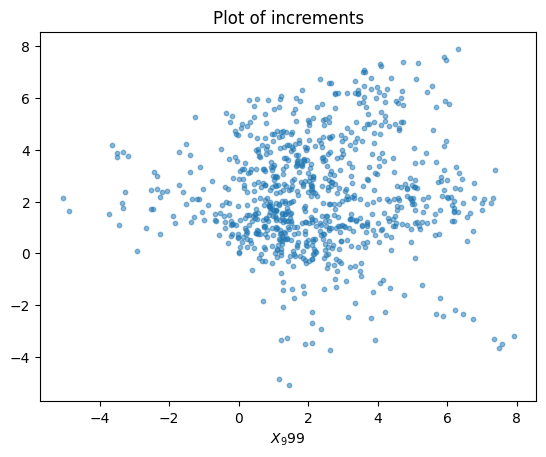

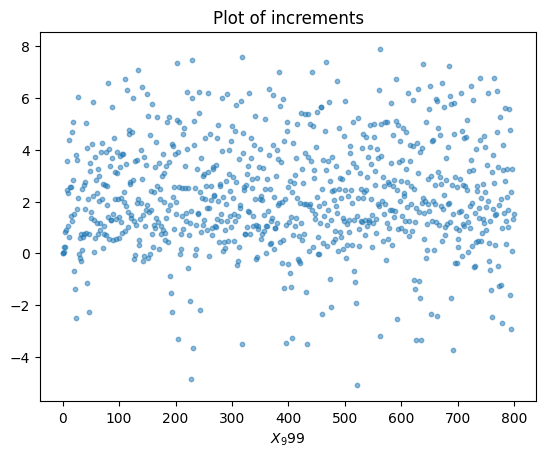

In [87]:
# Algorithm:
# The 


data = pd.read_csv('/Users/03mare02/Documents/GitHub/advanced_time_series_analysis/DataPart5.csv')
print(data.head())
plt.figure()
plt.scatter(data['x'][ : -1], data['x'][1 : ], label = 'Plot of one-step lag', s = 10, alpha=0.5)
plt.xlabel(rf'$X_{t-1}$')
plt.xlabel(rf'$X_{t}$')
plt.title(f'Plot of increments')
plt.show()

plt.figure()
plt.scatter([i for i in range(len(data['x']))], data['x'], label = 'Plot of one-step lag', s = 10, alpha=0.5)
plt.xlabel(rf'$X_{t-1}$')
plt.xlabel(rf'$X_{t}$')
plt.title(f'Plot of increments')
plt.show()


def least_squares():
    # Least squares algorithm for fitting data

    pass

def ARMA(X, epsilon, p, q, sigma):
    # 1. Check if the length is sufficient for AR
    # 2. calculate new based on previous
    # 3. Fit parameters through least squares?
    # if p > len(X):
    # data.append()
    # Append a new random error to the model
    epsilon.append(np.random.normal(0, sigma))
    if len(X) >= p:
        MA_parameters, AR_parameters = np.ones(p), np.ones(q)
        X_t = sum(X[-p : ]) + sum(epsilon[-(q + 1)])
        X.append(X_t)
    else:
        MA_parameters, AR_parameters = np.ones(len(X)), np.ones(len(X))
        X_t = sum(X[-len(X) : ]) + sum(epsilon[-(len(X) + 1)])
        X.append(X_t)
    return X


X = [0, 0]



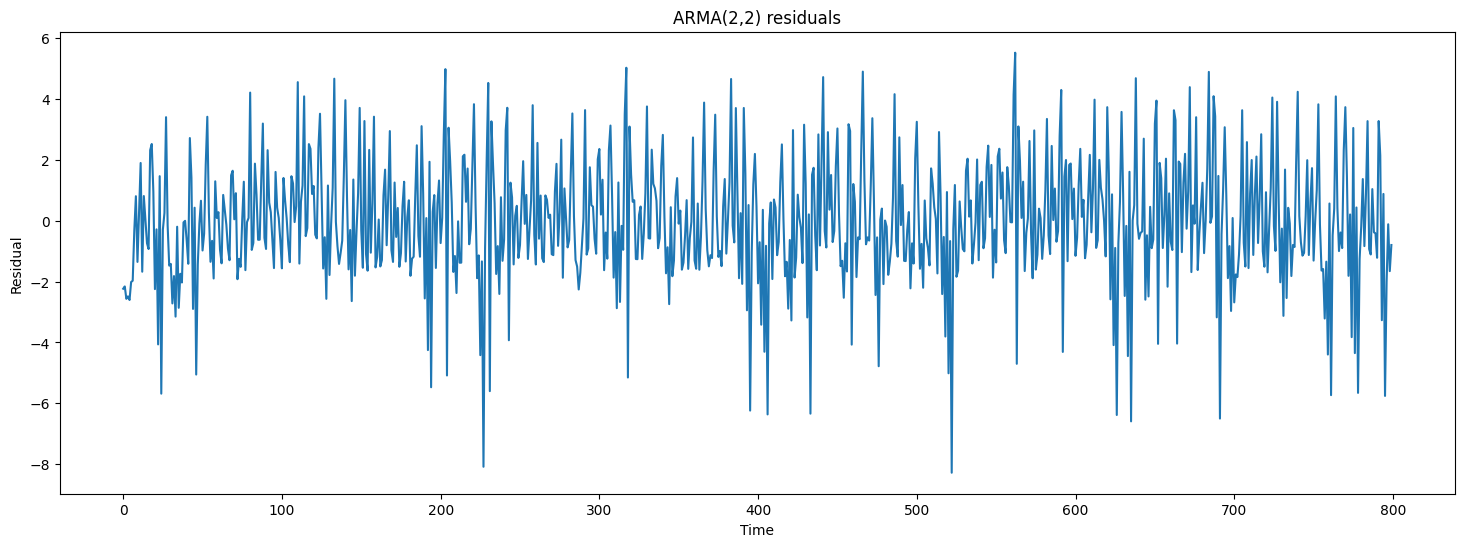

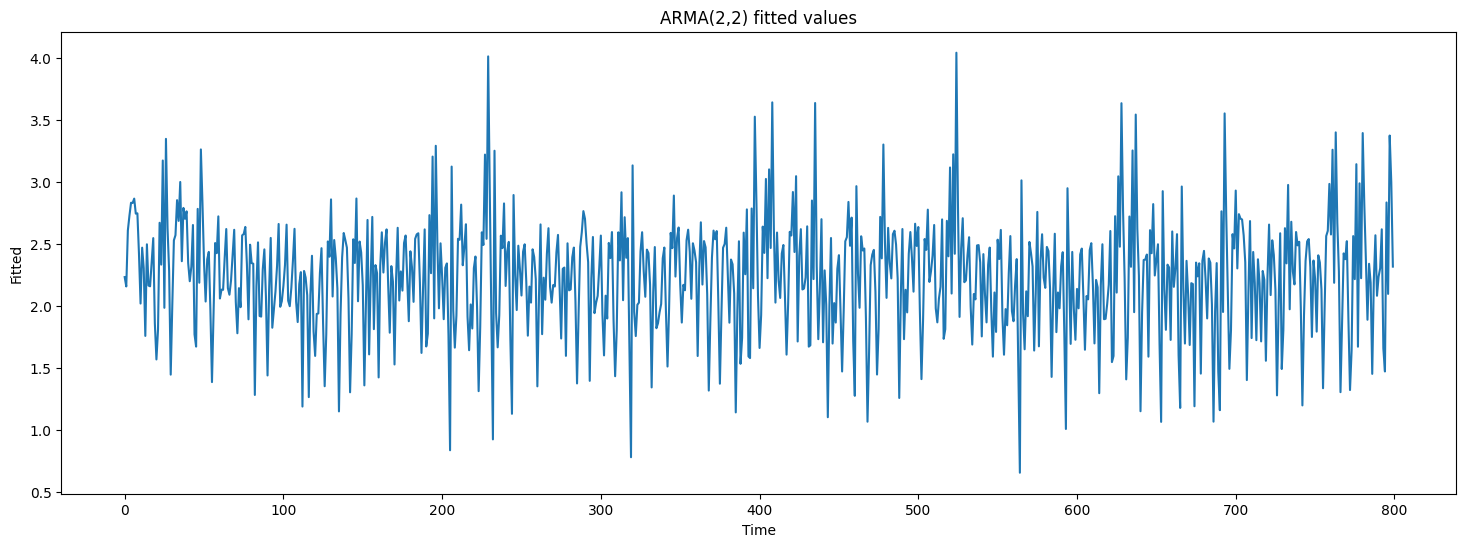

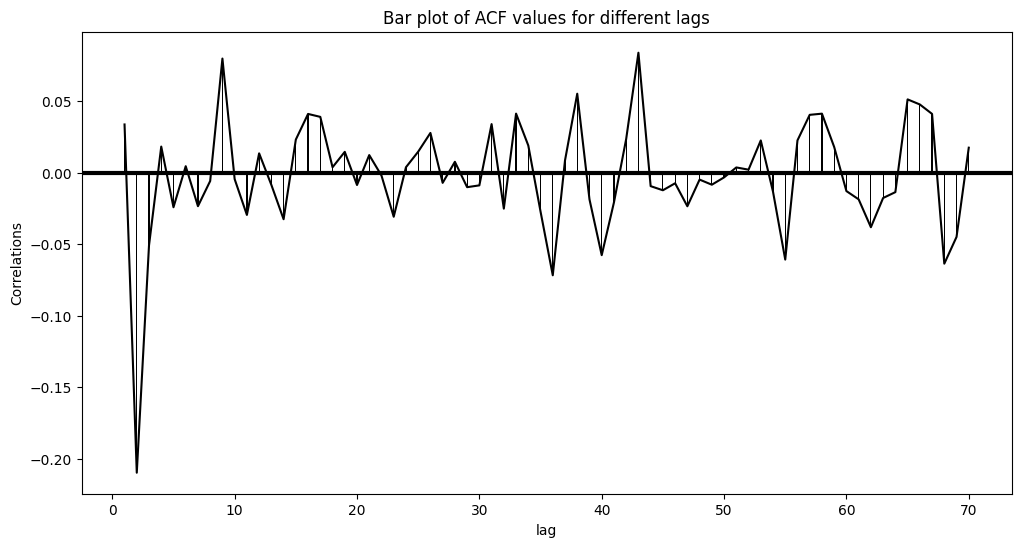

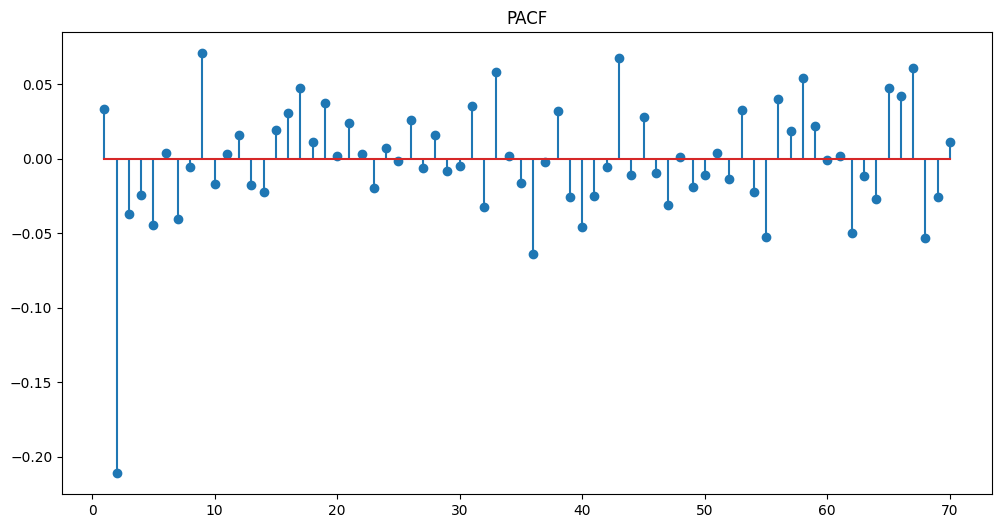

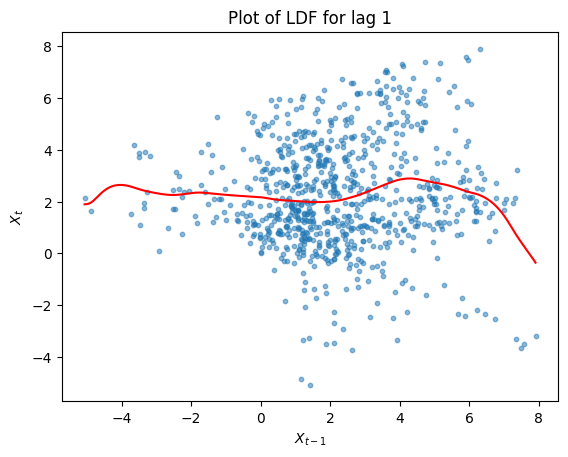

(array([], dtype=int64),)
-0.19159361710795836


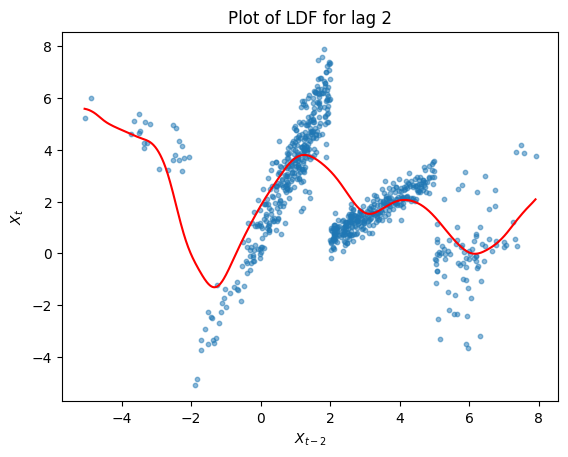

(array([], dtype=int64),)
-1.2877512376617237


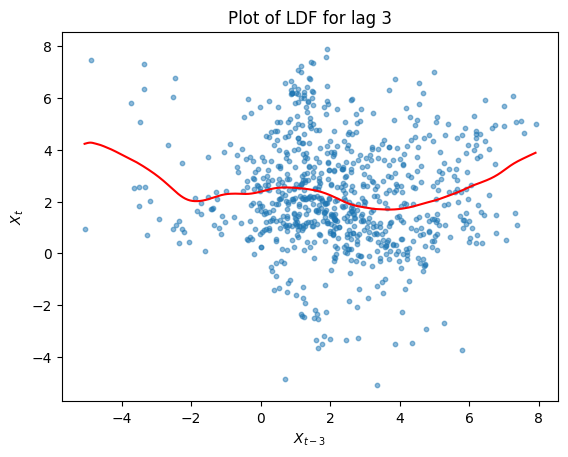

(array([], dtype=int64),)
-1.2792446178485355


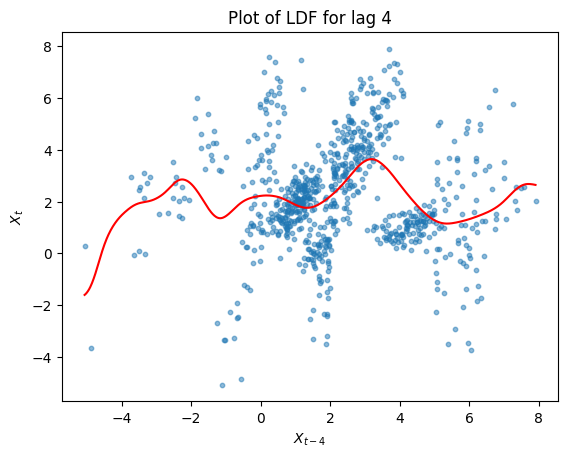

(array([], dtype=int64),)
-0.8446105519219896


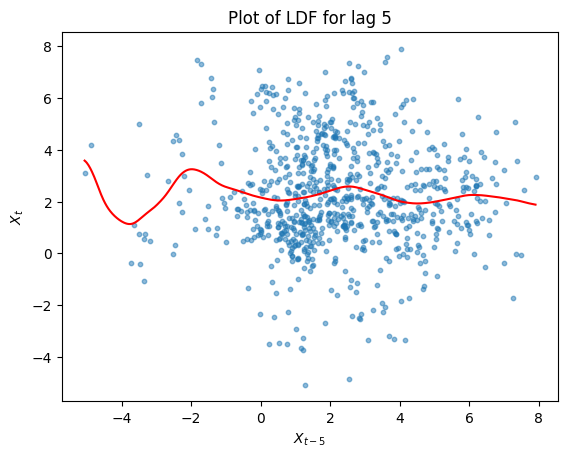

(array([], dtype=int64),)
-0.1617206668785572


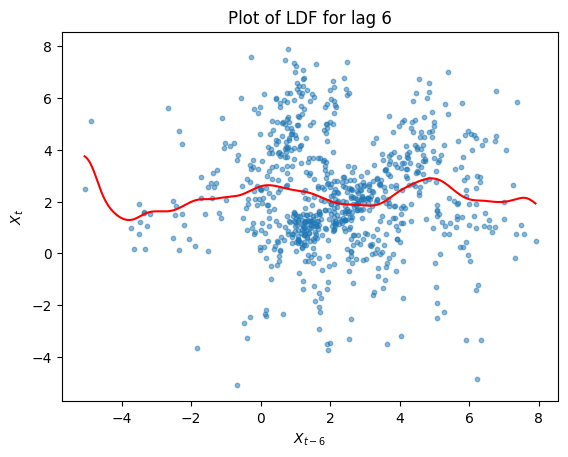

(array([], dtype=int64),)
-0.2551086069719409


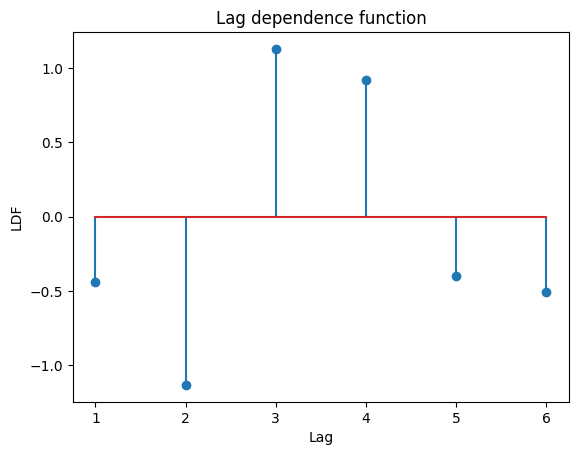

In [119]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import pacf

# Thoguht process
# Fit model of orders
# For each model, evaluate the ACF and PACF for significant lags, until residuals looks white
# Then do LDF function
# Do you find any significant non-linearities?
# Propose a better model structure

# Try a 0,0 ARMA model

def fit_ARMA(X, p, q, h = 1.2):
    # Fit the ARMA model without any integrated term
    model = ARIMA(X, order = (p, 0, q))
    result = model.fit()
    # print(result.summary())

    plt.figure(figsize=(18, 6))
    plt.plot(result.resid)
    plt.title(f'ARMA({p},{q}) residuals')
    plt.xlabel('Time')
    plt.ylabel('Residual')
    plt.show()

    plt.figure(figsize=(18, 6))
    plt.plot(result.fittedvalues)
    plt.title(f'ARMA({p},{q}) fitted values')
    plt.xlabel('Time')
    plt.ylabel('Fitted')
    plt.show()

    

    # Computing the ACF function
    ACF_values = [1]
    final_lag = 70
    for lag in range(1, final_lag + 1):
        ACF_values.append(ACF(np.array(X), lag))
    
    # Plot ACF function
    plt.figure(figsize=(12, 6))
    plt.bar([lag for lag in range(len(ACF_values))][1 : ], ACF_values[1 : ], width = 0.1, color = 'black')
    plt.plot([lag for lag in range(len(ACF_values))][1 : ], ACF_values[1 : ], color = 'black')
    plt.title(f'Bar plot of ACF values for different lags')
    plt.xlabel(f'lag')
    plt.ylabel(f'Correlations')
    plt.axhline(y=0, color='black', linewidth=3)
    plt.show()

    # Computing PACF function
    pacf_values = pacf(np.array(X), nlags = final_lag)
    plt.figure(figsize=(12, 6))
    plt.stem(range(len(pacf_values))[1 : ], pacf_values[1 : ])
    plt.title("PACF")
    plt.show()

    # Strong dependance of lag 2! => we will be pursuing a ARMA(2, 2) model


    # Compute the LDF -- of residuals
    # LDF(k) = sign(f(b) - f(a)) * np.sqrt(R2_0+)
    # Decide the sign of the smoothed function for the min and max for the lag function of order k, for the min and max a and b of time series
    # Determine R2 for the time series
    # Compute LDF(k) for the values
    # How can the non-linearities be determined?
    # How is it interpreted?
    # Propse a better model structure, seasonal?, oscillating terms, what do we have non-linear for?

    # Running the LDF function:
    # Computing the ACF function
    LDF_values = [1]
    LDF_final_lag = 6
    for lag in range(1, LDF_final_lag + 1):
        LDF_values.append(LDF(np.array(X), lag, h))
    plt.figure()
    plt.stem(range(len(LDF_values))[1 : ], LDF_values[1 : ])
    plt.title('Lag dependence function')
    plt.xlabel('Lag')
    plt.ylabel('LDF')
    plt.show()

    # Investigation of plots:
    # As can be observed in the second image, it clearly looks like the model have different regimes, dependant on second order lag, 
    # a SETAR model with 4 regimes, divided by [-2, 0, 2, 5]. This model of 4 regimes is a SETAR(4, 2, 2) 
    # model and will be investigated further and fitted
    # The model should produce white noise when fitted, as we see that four different regimes have different dependancies to the X_t_minus_2

    # The LDF function is essentially an indicator function of if we have varying parameters, if the fit is much better using a 
    # local function estimation, rather than the generalized linear model (linear in parameters)
    # A strong value of it shows that the regression benefits largely of a local polynomial estimation, 
    # that cannot be described by linear relationships => non-linearities in the variables
    
    # To do:
    # Add standard deviations to plots
    # Make sure that everything is in



# def kernel(x):
#     return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)

def kernel(x, kernel_function = 'tricube'):

    # Define different cases of kernel functions
    if kernel_function == 'gaussian':
        return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)
    elif kernel_function == 'tricube':
        mask = np.abs(x) <= 1
        out = np.zeros_like(x, dtype=float)
        uu = np.abs(x[mask])
        out[mask] = (1 - uu**3)**3
        return out
    else:
        return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)
    

def f(X, Y, x, h):
    return sum(kernel((x - X) / h) * Y) / sum(kernel((x - X) / h))

def sign(x):
    if x < 0:
        return -1
    elif x > 0:
        return 1
    else:
        return 0

def LDF(X, k, h):
    X_t, X_t_k = X[k : ], X[ : -k]
    X_span = np.linspace(min(X_t_k), max(X_t_k), len(X_t))
    X_t_hat = []

    # Time series estimation as a function of lagged time series
    for x in X_span:
        X_t_hat.append(sum(kernel((x - X_t_k) / h) * X_t) / sum(kernel((x - X_t_k) / h)))
    
    plt.figure()
    plt.title(f'Plot of LDF for lag {k}')
    plt.scatter(X_t_k, X_t, s = 10, alpha = 0.5)
    plt.plot(X_span, X_t_hat, label = 'Kernel regression of data', color = 'red')
    plt.xlabel(rf'$X_{{t-{k}}}$')
    plt.ylabel(rf'$X_t$')
    plt.show()
    


    # For R_2, we need to fit a local polynomial regression

    # Defined the kernel function approximate, local polynomial regression or conditional parameter model could be used
    # R_2 = (sum((X_t - 1 / len(X_t) * sum(X_t)) ** 2) - sum((X_t - X_t_hat) ** 2)) / sum((X_t - 1 / len(X_t) * sum(X_t)) ** 2)
    X_t_hat = local_polynomial_regression(X_span, X_t_k, X_t, h)
    print(np.where(np.isnan(X_t_hat)))
    R_2 = (sum((X_t - 1 / len(X_t) * sum(X_t)) ** 2) - sum((X_t - X_t_hat) ** 2)) / sum((X_t - 1 / len(X_t) * sum(X_t)) ** 2)
    print(R_2)
    R_2_plus_0_k = max(abs(R_2), 0)
    
    # Computing the LDF
    # LDF_val = sign(f(X_t_k, X_t, max(X_t_k), h) - f(X_t_k, X_t, min(X_t_k), h)) * np.sqrt(R_2_plus_0_k)
    LDF_val = sign(local_polynomial_regression([max(X_t_k)], X_t_k, X_t, h) - local_polynomial_regression([min(X_t_k)], X_t_k, X_t, h)) * np.sqrt(R_2_plus_0_k)
    
    return LDF_val



def local_polynomial_regression(X_span, X, Y, h, degree_of_polynomial = 3):
    X_hat = []
    for x in X_span:
        weights = kernel((x - X) / h)
        X_design = np.vander(X - x, N = degree_of_polynomial + 1, increasing=True)  # columns: 1, (x-x0), (x-x0)^2, ...
        
        # Weighted least squares: solve (X^T W X) beta = X^T W Y
        W = np.diag(weights)
        XT_W = X_design.T @ W
        try:
            theta = np.linalg.solve(XT_W @ X_design, XT_W @ Y)
            X_hat.append(theta[0])
        except np.linalg.LinAlgError:
            X_hat.append(np.nan)
            
    return np.array(X_hat)

    pass


def ACF(X, k):
    X_t, X_t_k = X[k : ], X[ : -k]
    return (np.sum((X_t - np.mean(X)) * (X_t_k - np.mean(X))) / (len(X) - k)) / np.var(X) # scalar product to compute the covariance between the two time series



fit_ARMA(data['x'], 2, 2, h = 1.5)
